## 1. Базовая работа с python/numpyd

#### Импорт необходимых библиотек

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### Загрузка детерктора и предобученной модели используя библиотеку dlib

In [3]:
face_detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor("C:\\Users\\user\\Downloads\\shape_predictor_68_face_landmarks.dat\\shape_predictor_68_face_landmarks.dat")

#### Занрузка самих фото из интернета (helen)

In [4]:
image_paths = [r'C:\Users\user\Downloads\Image.png',r"C:\Users\user\Downloads\299527853_1.jpg",r"C:\Users\user\Downloads\299189676_1.jpg",
               r'C:\Users\user\Downloads\31681454_1.jpg',r'C:\Users\user\Downloads\305917477_1.jpg',r"C:\Users\user\Downloads\298620293_1.jpg",
               r'C:\Users\user\Downloads\279534306_1.jpg',r"C:\Users\user\Downloads\279233131_1.jpg",r"C:\Users\user\Downloads\297461011_1.jpg",
               r"C:\Users\user\Downloads\277967015_1.jpg",r"C:\Users\user\Downloads\277942089_1.jpg",r"C:\Users\user\Downloads\296961468_1.jpg",
               r"C:\Users\user\Downloads\277485584_1.jpg",r"C:\Users\user\Downloads\276823387_1.jpg",r"C:\Users\user\Downloads\276753589_1.jpg",
              r"C:\Users\user\Downloads\296814969_3.jpg",r"C:\Users\user\Downloads\296814969_2.jpg",r"C:\Users\user\Downloads\296814969_1.jpg",
              r"C:\Users\user\Downloads\295960450_1.jpg",r"C:\Users\user\Downloads\21161074_1.jpg"]

In [5]:
images = [cv2.imread(path) for path in image_paths]

Посмотрим, правильно ли загрузились изображения

In [6]:
images

[array([[[129, 138, 225],
         [129, 138, 225],
         [129, 138, 225],
         ...,
         [123, 150, 231],
         [112, 132, 220],
         [ 90,  97, 198]],
 
        [[129, 138, 225],
         [129, 138, 225],
         [129, 138, 225],
         ...,
         [123, 150, 231],
         [112, 132, 220],
         [ 90,  97, 198]],
 
        [[129, 138, 225],
         [129, 138, 225],
         [129, 138, 225],
         ...,
         [123, 150, 231],
         [112, 132, 220],
         [ 90,  97, 198]],
 
        ...,
 
        [[ 57,  16,  82],
         [ 57,  16,  82],
         [ 57,  27,  93],
         ...,
         [ 82,  70, 176],
         [ 82,  68, 170],
         [ 82,  70, 176]],
 
        [[ 57,  21,  88],
         [ 57,  21,  88],
         [ 57,  32,  99],
         ...,
         [ 82,  73, 181],
         [ 82,  73, 181],
         [ 82,  73, 181]],
 
        [[ 57,  21,  88],
         [ 57,  21,  88],
         [ 57,  32,  99],
         ...,
         [ 82,  73, 181],
  

Напишем функцию для детекции лица и ключевых точек на лице
- Преобразование изображения в оттенки серого
- бнаружение лиц на изображении, используя готовый детектор
- Извлечение первого обнаруженного лица и ключевых точек (landmarks)
- Добавим None, None, в случае, если лицо не было обнаружено

In [7]:
def detect_face_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    if faces:
        face = faces[0]
        landmarks = shape_predictor(gray, face)
        return face, landmarks
    return None, None

In [8]:
images_visualize = min(10, len(images))

#### Визаулизация результата 

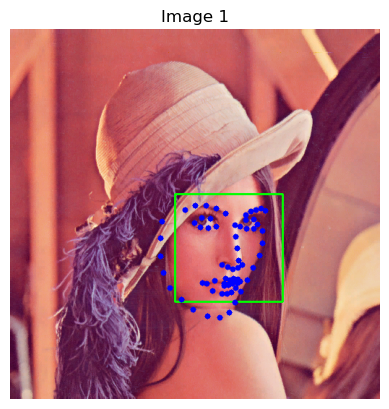

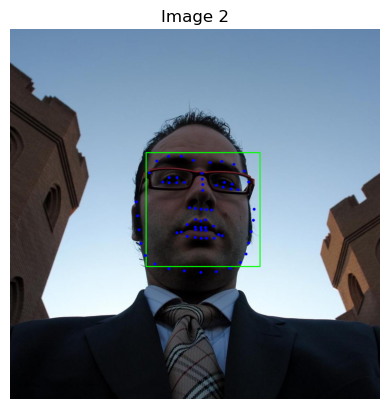

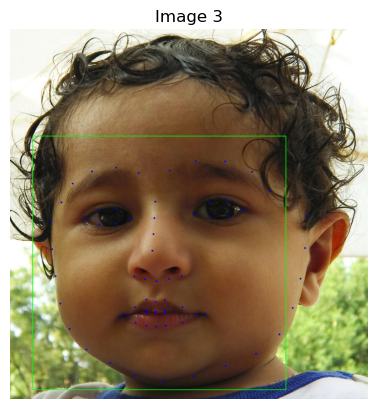

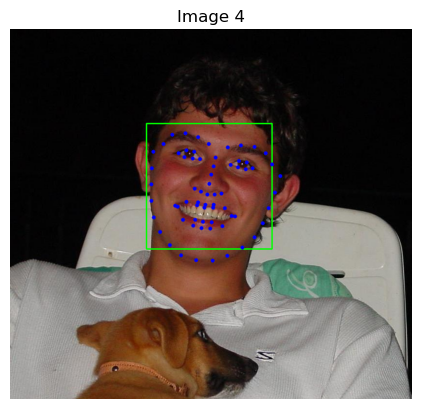

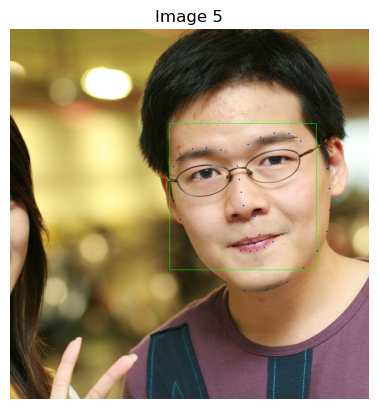

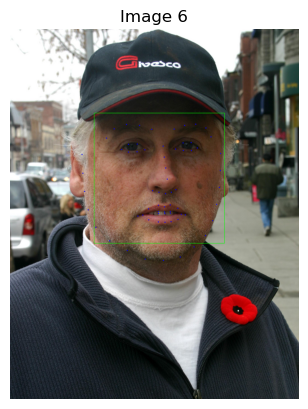

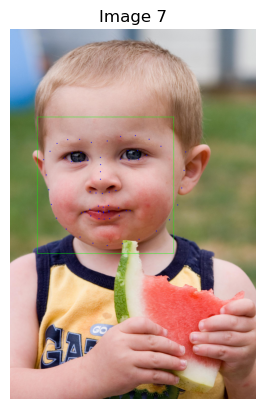

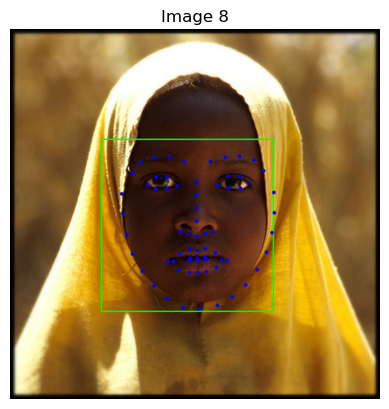

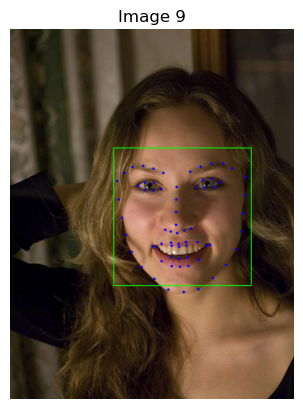

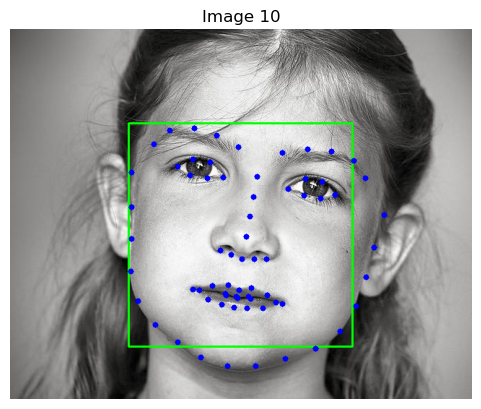

In [9]:
for i in range(images_visualize):
    # Детекция лица и ключевых точек
    face, landmarks = detect_face_landmarks(images[i])

    if face is not None and landmarks is not None:
        # Рисование прямоугольника вокруг лица
        cv2.rectangle(images[i], (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

        # Рисование ключевых точек на лице
        for point in landmarks.parts():
            cv2.circle(images[i], (point.x, point.y), 4, (255, 0, 0), -1)
        # Визуализация
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(f"Image {i+1}")
        plt.axis("off")
        plt.show()

#### Вывод

- В качестве готового face-landmark-detector был использован shape_predictor_68_face_landmarks.dat
- Для проверки работы предобученной модели был изспользована фото helen
- Модель работает, успешно определяет ключевые точки

## 2. Оценка метрик и валидация моделей

#### Загрузим данные и посмотрим на них

In [10]:
train_data = pd.read_csv(r"C:\Users\user\Downloads\facial-keypoints-detection\training\training.csv")
test_data = pd.read_csv(r"C:\Users\user\Downloads\facial-keypoints-detection\test\test.csv")
submission_format = pd.read_csv(r"C:\Users\user\Downloads\facial-keypoints-detection\SampleSubmission.csv")

In [11]:
train_data.head().T

0  \
left_eye_center_x                                                  66.033564   
left_eye_center_y                                                  39.002274   
right_eye_center_x                                                 30.227008   
right_eye_center_y                                                 36.421678   
left_eye_inner_corner_x                                            59.582075   
left_eye_inner_corner_y                                            39.647423   
left_eye_outer_corner_x                                            73.130346   
left_eye_outer_corner_y                                            39.969997   
right_eye_inner_corner_x                                           36.356571   
right_eye_inner_corner_y                                           37.389402   
right_eye_outer_corner_x                                           23.452872   
right_eye_outer_corner_y                                           37.389402   
left_eyebrow_inner_end_x                                           56.953263   
left_eyebrow_inner_end_y                                           29.033648   
left_eyebrow_outer_end_x                                           80.227128   
left_eyebrow_outer_end_y                                           32.228138   
right_eyebrow_inner_end_x                                          40.227609   
right_eyebrow_inner_end_y                                          29.002322   
right_eyebrow_outer_end_x                                          16.356379   
right_eyebrow_outer_end_y                                          29.647471   
nose_tip_x                                                         44.420571   
nose_tip_y                                                         57.066803   
mouth_left_corner_x                                                61.195308   
mouth_left_corner_y                                                79.970165   
mouth_right_corner_x                                               28.614496   
mouth_right_corner_y                                               77.388992   
mouth_center_top_lip_x                                             43.312602   
mouth_center_top_lip_y                                             72.935459   
mouth_center_bottom_lip_x                                          43.130707   
mouth_center_bottom_lip_y                                          84.485774   
Image                      238 236 237 238 240 240 239 241 241 243 240 23...   

                                                                           1  \
left_eye_center_x                                                  64.332936   
left_eye_center_y                                                  34.970077   
right_eye_center_x                                                 29.949277   
right_eye_center_y                                                 33.448715   
left_eye_inner_corner_x                                             58.85617   
left_eye_inner_corner_y                                            35.274349   
left_eye_outer_corner_x                                            70.722723   
left_eye_outer_corner_y                                            36.187166   
right_eye_inner_corner_x                                           36.034723   
right_eye_inner_corner_y                                           34.361532   
right_eye_outer_corner_x                                           24.472511   
right_eye_outer_corner_y                                           33.144443   
left_eyebrow_inner_end_x                                           53.987404   
left_eyebrow_inner_end_y                                           28.275949   
left_eyebrow_outer_end_x                                           78.634213   
left_eyebrow_outer_end_y                                           30.405923   
right_eyebrow_inner_end_x                                          42.728851   
right_eyebrow_inner_end_y                                          26.1460

In [12]:
test_data.head()

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...

In [13]:
submission_format.head()

RowId  Location
0      1         0
1      2         0
2      3         0
3      4         0
4      5         0

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [15]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

#### Удалим пропуски и обновим индексацию

In [16]:
train_data = train_data.dropna(subset=['left_eye_center_x',
'left_eye_center_y',
'right_eye_center_x',
'right_eye_center_y',
'left_eye_inner_corner_x',
'left_eye_inner_corner_y',
'left_eye_outer_corner_x',
'left_eye_outer_corner_y',
'right_eye_inner_corner_x',
'right_eye_inner_corner_y',
'right_eye_outer_corner_x',
'right_eye_outer_corner_y',
'left_eyebrow_inner_end_x',
'left_eyebrow_inner_end_y',
'left_eyebrow_outer_end_x',
'left_eyebrow_outer_end_y',
'right_eyebrow_inner_end_x',
'right_eyebrow_inner_end_y',
'right_eyebrow_outer_end_x',
'right_eyebrow_outer_end_y',
'mouth_left_corner_x',
'mouth_left_corner_y',
'mouth_right_corner_x',
'mouth_right_corner_y',
'mouth_center_top_lip_x',
'mouth_center_top_lip_y',
'mouth_center_bottom_lip_x',
'mouth_center_bottom_lip_y'])

In [17]:
train_data = train_data.dropna()
print("clean_train_data shape: {}".format(np.shape(train_data)))

clean_train_data shape: (2140, 31)


Обновим индексы после удаления пропусков

In [18]:
train_data = train_data.reset_index(drop=True)

#### Разделим данные на фото и координаты точек, так же создадим список для 68 координат 

In [19]:
imag = []
for i in range(0,2140):
    img = train_data['Image'][i].split(' ')
    image_list = ['0' if x == '' else x for x in img]
    imag.append(img)

In [20]:
image_list = np.array(imag,dtype = 'float')
train = image_list.reshape(-1,96,96,1)

In [21]:
train

array([[[[238.],
         [236.],
         [237.],
         ...,
         [250.],
         [250.],
         [250.]],

        [[235.],
         [238.],
         [236.],
         ...,
         [249.],
         [250.],
         [251.]],

        [[237.],
         [236.],
         [237.],
         ...,
         [251.],
         [251.],
         [250.]],

        ...,

        [[186.],
         [183.],
         [181.],
         ...,
         [ 52.],
         [ 57.],
         [ 60.]],

        [[189.],
         [188.],
         [207.],
         ...,
         [ 61.],
         [ 69.],
         [ 78.]],

        [[191.],
         [184.],
         [184.],
         ...,
         [ 70.],
         [ 75.],
         [ 90.]]],


       [[[219.],
         [215.],
         [204.],
         ...,
         [ 92.],
         [ 88.],
         [ 84.]],

        [[222.],
         [219.],
         [220.],
         ...,
         [ 92.],
         [ 88.],
         [ 86.]],

        [[231.],
         [224.],
      

In [22]:
train = train.astype('uint8')

In [23]:
len(train)

2140

Посмотрим на некоторые изображения

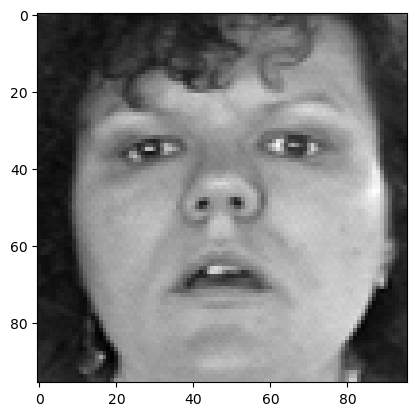

In [24]:
plt.imshow(train[500].reshape(96,96),cmap='gray')
plt.show()

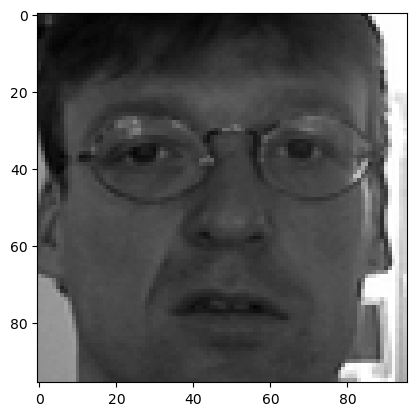

In [25]:
plt.imshow(train[15].reshape(96,96),cmap='gray')
plt.show()

Создадим переменную с правильными позициями точек 

In [26]:
train_data = train_data.loc[0:2140]

In [27]:
ground_truth_points = np.array(train_data.iloc[:, :-1]) 

In [28]:
ground_truth_points[3]

array([65.22573913, 37.26177391, 32.02309565, 37.26177391, 60.00333913,
       39.12717913, 72.31471304, 38.38096696, 37.61864348, 38.75411478,
       25.30726957, 38.00790261, 56.4338087 , 30.92986435, 77.91026087,
       31.66572522, 41.67151304, 31.04998957, 20.45801739, 29.90934261,
       51.88507826, 54.16653913, 65.59888696, 72.70372174, 37.24549565,
       74.19547826, 50.30316522, 70.09168696, 51.56118261, 78.26838261])

In [29]:
len(ground_truth_points)

2140

Проверим нормально ли отображаються 68 точек модели

In [30]:
def detect_landmarks(image):
    faces = face_detector(image)
    if faces:
        face = faces[0]
        landmarks = shape_predictor(image, face)
        return face, landmarks
    return None, None

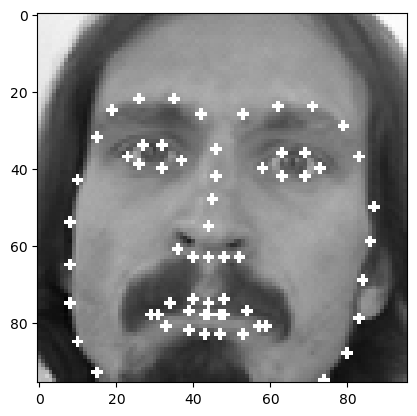

In [31]:
face, landmarks = detect_landmarks(train[0])

if face is not None and landmarks is not None:
    for point in landmarks.parts():
        cv2.circle(train[0], (point.x, point.y), 1, (255, 0, 0), -1)

    plt.imshow(cv2.cvtColor(train[0], cv2.COLOR_BGR2RGB))
    plt.show()

Создадим пустой список для накомпления там координат 68 точек 

In [32]:
train_68 = []

In [33]:
train_point_68 = []

In [34]:
for i in range(0,2140):
    face, landmarks = detect_landmarks(train[i])
    train_68_n = []
    if face is not None and landmarks is not None:
        for point in landmarks.parts():
            cv2.circle(train[i], (point.x, point.y), 1, (255, 0, 0), -1)
            x = point.x
            y = point.y
            train_68_n.append(x)
            train_68_n.append(y) 
        train_point_68.append(np.array(train_68_n))
    else:
        train_68_n = []
        train_point_68.append(np.array(train_68_n))

In [35]:
train_point_68

[array([ 11,  41,   9,  52,   9,  63,   9,  73,  10,  83,  14,  91,  21,
         96,  31,  99,  43, 100,  55, 100,  66,  98,  75,  93,  81,  87,
         84,  78,  85,  69,  87,  58,  88,  48,  15,  31,  19,  25,  27,
         22,  35,  22,  42,  25,  54,  26,  63,  24,  72,  25,  80,  29,
         84,  37,  47,  35,  46,  41,  45,  47,  44,  53,  36,  59,  39,
         60,  44,  62,  48,  61,  52,  61,  22,  36,  27,  33,  33,  33,
         38,  38,  32,  40,  26,  39,  58,  40,  63,  36,  70,  36,  74,
         41,  69,  43,  63,  43,  27,  77,  33,  73,  39,  71,  44,  73,
         48,  72,  54,  75,  60,  80,  53,  84,  47,  84,  42,  84,  38,
         83,  32,  82,  30,  77,  39,  75,  43,  76,  48,  76,  57,  80,
         47,  79,  43,  79,  38,  79]),
 array([ 8, 31,  8, 41,  9, 52, 12, 62, 16, 71, 21, 80, 27, 88, 34, 95, 42,
        97, 51, 96, 58, 92, 65, 85, 70, 77, 75, 68, 78, 58, 81, 48, 82, 37,
        17, 24, 22, 21, 29, 20, 36, 21, 42, 24, 53, 25, 60, 23, 67, 22, 74,
  

In [36]:
len(train_point_68)

2140

#### Соотнесение 68-ми точечной разметки и 15-ти точечной

Наверняка можно было решить задачу элегантнее. Но я использую самый простой для меня способ приведения полученых 68 координат к эквивалентным значениям 15-ти точечной модели (вручную пересчет по схемам расположения точек в 68 модели и соотнесение с точками из 15 модели)
Напишем функцию для преодразования 

In [37]:
def maker_15 (train_68):
    try:
        train_15 = []
        j = train_68[86]
        u = train_68[88]
        j = j+u
        u = train_68[92]
        j = j+u
        u = train_68[94]
        j = j+u
        j = j/4
        train_15.append(j)
        j = train_68[87]
        u = train_68[89]
        j = j+u
        u = train_68[93]
        j = j+u
        u = train_68[95]
        j = j+u
        j = j/4
        train_15.append(j)
        j = train_68[74]
        u = train_68[76]
        j = j+u
        u = train_68[80]
        j = j+u
        u = train_68[82]
        j = j+u
        j = j/4
        train_15.append(j)
        j = train_68[75]
        u = train_68[77]
        j = j+u
        u = train_68[81]
        j = j+u
        u = train_68[83]
        j = j+u
        j = j/4
        train_15.append(j)
        train_15.append(train_68[84])
        train_15.append(train_68[85])
        train_15.append(train_68[90])
        train_15.append(train_68[91])
        train_15.append(train_68[78])
        train_15.append(train_68[79])
        train_15.append(train_68[72])
        train_15.append(train_68[73])
        train_15.append(train_68[44])
        train_15.append(train_68[45])
        train_15.append(train_68[52])
        train_15.append(train_68[53])
        train_15.append(train_68[42])
        train_15.append(train_68[43])
        train_15.append(train_68[34])
        train_15.append(train_68[35])
        train_15.append(train_68[60])
        train_15.append(train_68[61])
        train_15.append(train_68[108])
        train_15.append(train_68[109])
        train_15.append(train_68[96])
        train_15.append(train_68[97])
        train_15.append(train_68[102])
        train_15.append(train_68[103])
        train_15.append(train_68[114])
        train_15.append(train_68[115])
        train_15 = np.array(train_15)
        return train_15
    except:
        pass

По итогу мы получаем туже последовательность координат что и изначальном датасете 

In [38]:
for i in range(len(train_point_68)):
    train_point_68[i] = maker_15(train_point_68[i])

In [39]:
train_point_68

[array([66.25, 39.5 , 29.5 , 36.25, 58.  , 40.  , 74.  , 41.  , 38.  ,
        38.  , 22.  , 36.  , 54.  , 26.  , 84.  , 37.  , 42.  , 25.  ,
        15.  , 31.  , 44.  , 53.  , 60.  , 80.  , 27.  , 77.  , 44.  ,
        73.  , 42.  , 84.  ]),
 array([63.75, 34.5 , 30.  , 32.5 , 56.  , 36.  , 70.  , 35.  , 37.  ,
        35.  , 23.  , 32.  , 53.  , 25.  , 78.  , 29.  , 42.  , 24.  ,
        17.  , 24.  , 47.  , 56.  , 56.  , 76.  , 35.  , 75.  , 46.  ,
        71.  , 45.  , 84.  ]),
 array([64.5, 35.5, 30.5, 35.5, 58. , 36. , 70. , 35. , 38. , 36. , 25. ,
        36. , 54. , 27. , 78. , 30. , 41. , 27. , 16. , 31. , 47. , 53. ,
        60. , 73. , 35. , 73. , 47. , 70. , 47. , 79. ]),
 array([65.75, 37.5 , 31.25, 37.5 , 59.  , 39.  , 72.  , 37.  , 39.  ,
        39.  , 25.  , 38.  , 54.  , 30.  , 79.  , 31.  , 43.  , 30.  ,
        17.  , 31.  , 50.  , 54.  , 63.  , 73.  , 37.  , 74.  , 51.  ,
        70.  , 52.  , 79.  ]),
 array([65.25, 38.5 , 28.5 , 37.5 , 57.  , 39.  , 72.  , 39.  

In [40]:
len(train_point_68)

2140

#### Расчет метрик

Напишем цикл для находжения среднего MSE для каждой фотографии
Так же подсчитаем MSE для всей модели в целом 

In [41]:
c = 0
count = 0
mse_everyone_points = 0
for i in range(0,2140):
    c = c +1
    try:
        mse = mean_squared_error(ground_truth_points[i], train_point_68[i])
        print("Номер фото:",c, "Среднее начение для фото:",mse)
        mse_everyone_points= mse_everyone_points+mse
    except:
        print("Модель не распознала фото")
        count = count +1
print("Потеряно фото", count)
mse_everyone_points = mse_everyone_points/206

Номер фото: 1 Среднее начение для фото: 3.768852641878921
Номер фото: 2 Среднее начение для фото: 1.7298208378005027
Номер фото: 3 Среднее начение для фото: 0.8510704411946483
Номер фото: 4 Среднее начение для фото: 1.4085065610724696
Номер фото: 5 Среднее начение для фото: 4.390858886151605
Номер фото: 6 Среднее начение для фото: 2.4102795902384426
Номер фото: 7 Среднее начение для фото: 3.9520062102124656
Номер фото: 8 Среднее начение для фото: 1.4380747384330925
Номер фото: 9 Среднее начение для фото: 1.2542095063466683
Номер фото: 10 Среднее начение для фото: 1.935336105763563
Номер фото: 11 Среднее начение для фото: 2.4861406443014733
Номер фото: 12 Среднее начение для фото: 1.9649273013333308
Номер фото: 13 Среднее начение для фото: 1.5421176025802632
Номер фото: 14 Среднее начение для фото: 3.9595570955530337
Номер фото: 15 Среднее начение для фото: 2.199178388179375
Номер фото: 16 Среднее начение для фото: 3.8746638646652634
Номер фото: 17 Среднее начение для фото: 2.0264580394

В общей сложности модель не смогла определить разметку на лице в 52 случаях из 2140

In [42]:
mse_everyone_points

30.624619542382213

Аналогично подсчитаем MAE, так же добавим список sortinf, он нам понадобиться для сравнения результатов

In [43]:
c = 0
count = 0
mae_everyone_points = 0
sorting = []
for i in range(0,2140):
    c = c +1
    try:
        mae = mean_absolute_error(ground_truth_points[i], train_point_68[i])
        print("Номер фото:",c, "Среднее начение для фото:",mae)
        mae_everyone_points= mse_everyone_points+mae
        sorting.append(mae)
    except:
        print("Модель не распознала фото")
        count = count +1
print("Потеряно фото", count)
mae_everyone_points = mse_everyone_points/206

Номер фото: 1 Среднее начение для фото: 1.4547717293233333
Номер фото: 2 Среднее начение для фото: 1.0330573049666674
Номер фото: 3 Среднее начение для фото: 0.7355712280666665
Номер фото: 4 Среднее начение для фото: 0.8645140869566669
Номер фото: 5 Среднее начение для фото: 1.537756973413334
Номер фото: 6 Среднее начение для фото: 1.2186280373866674
Номер фото: 7 Среднее начение для фото: 1.3118438478566667
Номер фото: 8 Среднее начение для фото: 0.8380519093833337
Номер фото: 9 Среднее начение для фото: 0.8127813333333335
Номер фото: 10 Среднее начение для фото: 1.023092307693333
Номер фото: 11 Среднее начение для фото: 1.1341081760966667
Номер фото: 12 Среднее начение для фото: 1.0468933333333326
Номер фото: 13 Среднее начение для фото: 0.9150982456066664
Номер фото: 14 Среднее начение для фото: 1.3274183006566667
Номер фото: 15 Среднее начение для фото: 1.1099157894766667
Номер фото: 16 Среднее начение для фото: 1.546412026133333
Номер фото: 17 Среднее начение для фото: 1.053383529

In [44]:
mae_everyone_points

0.14866320166204958

Таким же способом расчитаем значения для каждой из точек в каждом фото

MSE для каждой точки, каждого фото

In [45]:
c = 0
count = 0
mse_points = []
for i in range(0,2140):
    c = c +1
    k = 0
    try:
        for j in range(0,30,2):
            k = j + 2
            mse_points = mean_squared_error(ground_truth_points[i][j:k], train_point_68[i][j:k])
            print('Номер фото:',c,"Значение точки:" ,mse_points)
    except:
        print("Модель не распознала фото")
        count = count +1
print("Потеряно фото", count)

Номер фото: 1 Значение точки: 0.1472880332904538
Номер фото: 1 Значение точки: 0.27900666760093484
Номер фото: 1 Значение точки: 1.3136363771103685
Номер фото: 1 Значение точки: 0.9086022552517137
Номер фото: 1 Значение точки: 1.5368439964277738
Номер фото: 1 Значение точки: 2.0206370558162687
Номер фото: 1 Значение точки: 8.962392098804594
Номер фото: 1 Значение точки: 18.502614068130416
Номер фото: 1 Значение точки: 9.57997480177253
Номер фото: 1 Значение точки: 1.8345497096681442
Номер фото: 1 Значение точки: 8.357883514182841
Номер фото: 1 Значение точки: 0.7148259822777211
Номер фото: 1 Значение точки: 1.378956630670837
Номер фото: 1 Значение точки: 0.2383411394383604
Номер фото: 1 Значение точки: 0.7572372977408601
Номер фото: 2 Значение точки: 0.28039329217617237
Номер фото: 2 Значение точки: 0.4513164065411187
Номер фото: 2 Значение точки: 4.342138875440041
Номер фото: 2 Значение точки: 0.9658460647662159
Номер фото: 2 Значение точки: 0.6697002009487192
Номер фото: 2 Значение т

MAE для каждой точки, каждого фото

In [46]:
c = 0
count = 0
for i in range(0,2140):
    c = c +1
    k = 0
    try:
        for j in range(0,30,2):
            k = j + 2
            mae_points = mean_absolute_error(ground_truth_points[i][j:k], train_point_68[i][j:k])
            print('Номер фото:',c,"Значение точки:" ,mae_points)
    except:
        print("Модель не распознала фото")
        count = count +1
print("Потеряно фото", count)

Номер фото: 1 Значение точки: 0.35708120300000346
Номер фото: 1 Значение точки: 0.44934285715000044
Номер фото: 1 Значение точки: 0.9673263157999976
Номер фото: 1 Значение точки: 0.9498285713999977
Номер фото: 1 Значение точки: 1.1270135337999996
Номер фото: 1 Значение точки: 1.421136842150002
Номер фото: 1 Значение точки: 2.9934556390999987
Номер фото: 1 Значение точки: 4.272366917300001
Номер фото: 1 Значение точки: 2.88735639095
Номер фото: 1 Значение точки: 1.3544541353500001
Номер фото: 1 Значение точки: 2.243687218049999
Номер фото: 1 Значение точки: 0.612571428599999
Номер фото: 1 Значение точки: 1.0017443609000036
Номер фото: 1 Значение точки: 0.3759699247999997
Номер фото: 1 Значение точки: 0.8082406014999997
Номер фото: 2 Значение точки: 0.5265063829500001
Номер фото: 2 Значение точки: 0.4997191489499997
Номер фото: 2 Значение точки: 1.7909106383000015
Номер фото: 2 Значение точки: 0.954944680849998
Номер фото: 2 Значение точки: 0.8018723403999992
Номер фото: 2 Значение точки

#### Визуализация результатов

Напишем функцию для получения индексов вместо соответствующих элементов

In [47]:
def sort_index(lst, rev=True):
    index = range(len(lst))
    s = sorted(index, reverse=rev, key=lambda i: lst[i])
    return s

#### Визуализируем 3 изображений с самым высоким качеством детектирования

Найдем индексы самых удачно детекирванных фото

In [48]:
len(sorting)

2088

In [49]:
sort_index(sorting)[2085:2088]

[1221, 658, 1542]

In [50]:
sorting.index(min(sorting))

1542

И посмотрим на них

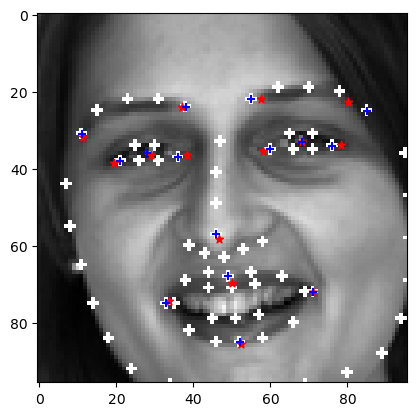

In [51]:
photo_visualize_pnts = ground_truth_points[1542]
train_point = train_point_68[1542]

plt.imshow(train[1542].reshape(96,96),cmap='gray')
plt.scatter(photo_visualize_pnts[0::2], photo_visualize_pnts[1::2], c='Red', marker='*')
plt.scatter(train_point[0::2], train_point[1::2], c='Blue', marker='+')
plt.show()

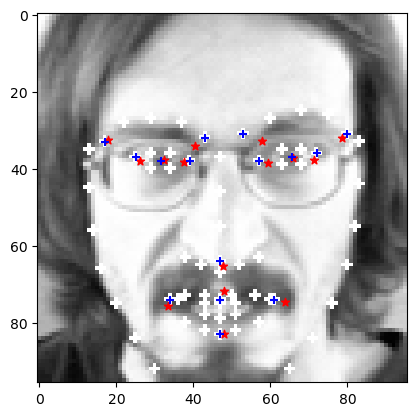

In [52]:
photo_visualize_pnts = ground_truth_points[658]
train_point = train_point_68[658]

plt.imshow(train[658].reshape(96,96),cmap='gray')
plt.scatter(photo_visualize_pnts[0::2], photo_visualize_pnts[1::2], c='Red', marker='*')
plt.scatter(train_point[0::2], train_point[1::2], c='Blue', marker='+')
plt.show()

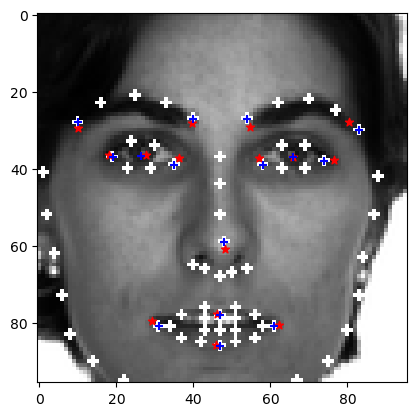

In [53]:
photo_visualize_pnts = ground_truth_points[1221]
train_point = train_point_68[1221]

plt.imshow(train[1221].reshape(96,96),cmap='gray')
plt.scatter(photo_visualize_pnts[0::2], photo_visualize_pnts[1::2], c='Red', marker='*')
plt.scatter(train_point[0::2], train_point[1::2], c='Blue', marker='+')
plt.show()

#### Визуализируем 3 изображений с самым низким качеством детектирования

Посмотрим индексы фото самых низкокачественных детекций

In [54]:
sorting.index(max(sorting))

1844

In [55]:
sort_index(sorting)[:3]

[1844, 1993, 1876]

И посмотрим на них

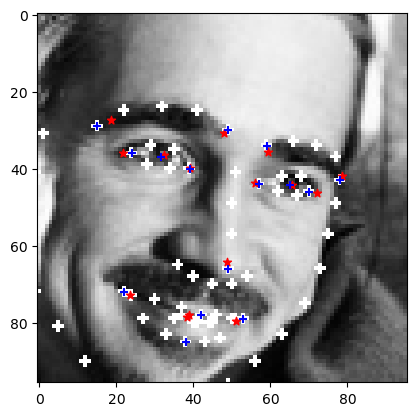

In [56]:
photo_visualize_pnts = ground_truth_points[1844]
train_point = train_point_68[1844]

plt.imshow(train[1844].reshape(96,96),cmap='gray')
plt.scatter(photo_visualize_pnts[0::2], photo_visualize_pnts[1::2], c='Red', marker='*')
plt.scatter(train_point[0::2], train_point[1::2], c='Blue', marker='+')
plt.show()

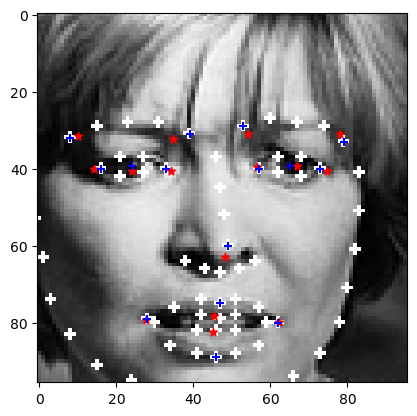

In [57]:
photo_visualize_pnts = ground_truth_points[1993]
train_point = train_point_68[1993]

plt.imshow(train[1993].reshape(96,96),cmap='gray')
plt.scatter(photo_visualize_pnts[0::2], photo_visualize_pnts[1::2], c='Red', marker='*')
plt.scatter(train_point[0::2], train_point[1::2], c='Blue', marker='+')
plt.show()

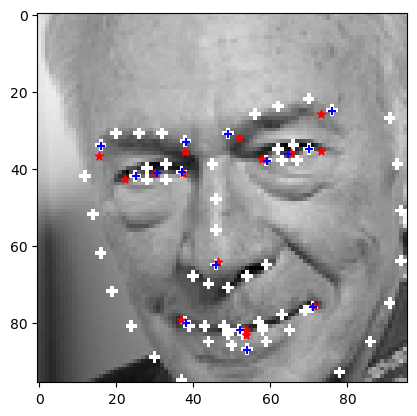

In [58]:
photo_visualize_pnts = ground_truth_points[1876]
train_point = train_point_68[1876]

plt.imshow(train[1876].reshape(96,96),cmap='gray')
plt.scatter(photo_visualize_pnts[0::2], photo_visualize_pnts[1::2], c='Red', marker='*')
plt.scatter(train_point[0::2], train_point[1::2], c='Blue', marker='+')
plt.show()

#### Вывод

- В ходе работы были загружены данные с кагла и очищенны от пропусков
- Используя предобученую модель - shape_predictor_68_face_landmarks были задетектированы точки на лицах из представленного датасета
- Так же были соотнесены 68 размеченых точек с 15 эквивалентным точкам из разметки
- Для расчетов были выбраны метрики MAE и MSE
- Так же были визуализированны 3 изображений с самым высоким качеством детектирования и 3 изображений с самым низким качеством детектирования